In [1]:
# Nash Cascade Neural Network
# A hydrologically intuitive deep learning network

# Set up a solution to a network of buckets where the number of buckets in each layer
# flows out to the buckets in the next layer
# The parameter on each bucket is the size and height of each spigot.

# Need a function that solves this individually at a single buckets
# Then a function that loops through and moves the water to the downstream buckets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ncnn import NashCascadeNeuralNetwork as ncnn
# Precipitation standard variable name used in the ncnn model interface
PRECIP_SVN = "atmosphere_water__liquid_equivalent_precipitation_rate"
DO_PLOT = True

In [3]:

# Example
bucket_net = ncnn(cfg_file="./config.json")
bucket_net.initialize()


Initial Mass in network at start: 205.0
Final Mass in network: 38.0
Total Mass out of network 276.0
Total precipitation into network 109.0
Final mass balance is 0.000
Final mass balance is 0.000


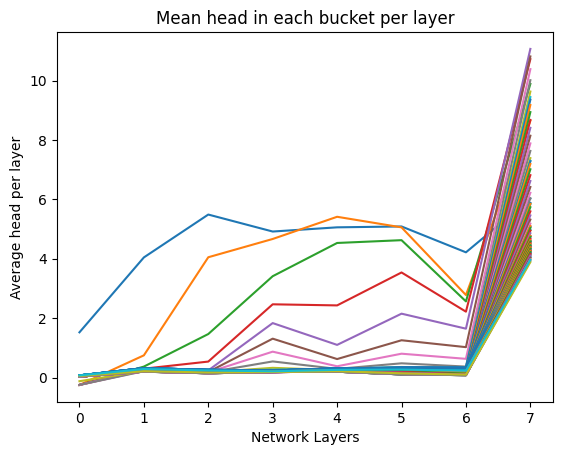

In [4]:
bucket_net.summarize_network()
inital_mass_in_network = np.sum([tensor.item() for tensor in bucket_net.sum_H_per_layer])
print(f"Initial Mass in network at start: {inital_mass_in_network:.1f}")
network_outflow_list = []
network_precip_input_list = []
count = 0
for i in range(500):

    ###########################################################################
    if count > 39:
        network_precip_input_list.append(1)
    else:
        network_precip_input_list.append(0)
    if count == 50:
        count = 0
    count+=1
    ###########################################################################

    ###########################################################################
    ###########################################################################
    bucket_net.set_value(PRECIP_SVN, np.array(network_precip_input_list[-1]))
    bucket_net.update_network()
    network_outflow_list.append(bucket_net.network_outflow.item())
    bucket_net.summarize_network()
    ###########################################################################
    ###########################################################################

    if DO_PLOT:
        if i % 5 == 0:
            plt.plot([tensor.item() for tensor in bucket_net.mean_H_per_layer])

###########################################################################
total_mass_precip_in = np.sum(np.array(network_precip_input_list))
final_mass_in_network = np.sum([tensor.item() for tensor in bucket_net.sum_H_per_layer])
total_mass_outflow = np.sum(network_outflow_list)
print(f"Final Mass in network: {final_mass_in_network:.1f}")
print(f"Total Mass out of network {total_mass_outflow:.1f}")
print(f"Total precipitation into network {total_mass_precip_in:.1f}")
mass_balance = (inital_mass_in_network + total_mass_precip_in) - (final_mass_in_network + total_mass_outflow)
print(f"Final mass balance is {mass_balance:.3f}")
mass_balance = (inital_mass_in_network - final_mass_in_network) - (total_mass_outflow - total_mass_precip_in)
print(f"Final mass balance is {mass_balance:.3f}")
if DO_PLOT:
    plt.title("Mean head in each bucket per layer")
    plt.ylabel("Average head per layer")
    plt.xlabel("Network Layers")
    plt.show()
    plt.close()

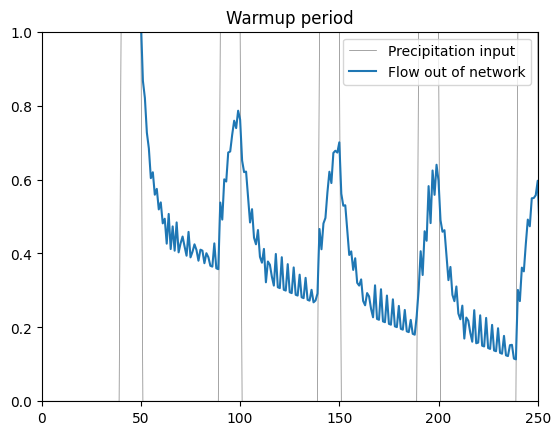

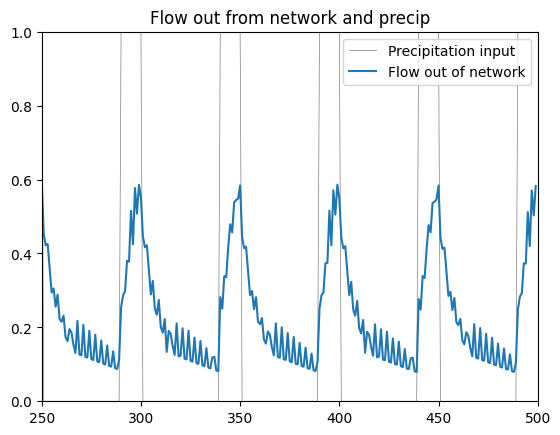

In [5]:
if DO_PLOT:
    startplt = 0
    endplt = 250

    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list, label="Flow out of network")
    plt.xlim([startplt, endplt])
    plt.ylim([0, np.max(np.array(network_precip_input_list)[startplt:endplt])])
    plt.legend()
    plt.title("Warmup period")
    plt.show()
    plt.close()
    startplt = int(len(network_outflow_list)-(len(network_outflow_list)/2))
    endplt = int(len(network_outflow_list))
    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list, label="Flow out of network")
    plt.xlim([startplt, endplt])
    plt.ylim([0, np.max(np.array(network_precip_input_list)[startplt:endplt])])
    plt.legend()
    plt.title("Flow out from network and precip")
    plt.show()
    plt.close()